In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
majors = pd.read_csv('college_majors.csv')
majors.drop(columns=['Unnamed: 0'], inplace=True)
majors.head()

,Major,Major_category,Grad_total,Grad_sample_size,Grad_employed,Grad_full_time_year_round,Grad_unemployed,Grad_unemployment_rate,Grad_median,Grad_P25,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,CONSTRUCTION SERVICES,Industrial Arts & Consumer Services,9173,200,7098,6511,681,0.087543,75000.0,53000,...,1751,12313,1042,0.060023,50000,36000,60000,3275,5351,703
1,COMMERCIAL ART AND GRAPHIC DESIGN,Arts,53864,882,40492,29553,2482,0.057756,60000.0,40000,...,24387,52243,8947,0.096798,35000,25000,45000,37389,38119,14839
2,HOSPITALITY MANAGEMENT,Business,24417,437,18368,14784,1465,0.073867,65000.0,45000,...,7494,23106,2393,0.061169,33000,25000,42000,2325,23341,9063
3,COSMETOLOGY SERVICES AND CULINARY ARTS,Industrial Arts & Consumer Services,5411,72,3590,2701,316,0.080901,47000.0,24500,...,2064,5949,510,0.055677,29000,20000,36000,563,7384,3163
4,COMMUNICATION TECHNOLOGIES,Computers & Mathematics,9109,171,7512,5622,466,0.058411,57000.0,40600,...,4690,9085,2006,0.119511,35000,25000,45000,4545,8794,2495


In [18]:
X = pd.read_csv('X_majors.csv')
y = pd.read_csv('y_majors.csv', header=None)

X.drop(columns=['Unnamed: 0'], inplace=True) # drop 0 col
y.drop(columns=[0], inplace=True) # drop 0 col
y.rename(columns={1:'Grad_median'}, inplace=True) # rename
y.head()

,Grad_median
0,-0.105477
1,-0.992621
2,-0.696907
3,-1.761479
4,-1.170050


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
### LINEAR REGRESSION ###
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg.score(X_test, y_test) # R^2

0.9303746679549911

Score:  0.75


(3.0, 0.0)

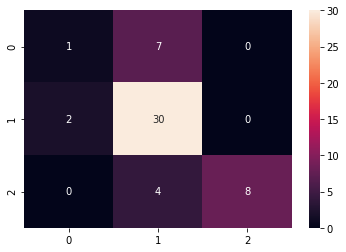

In [75]:
### KNN ###
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel().astype('int')) # make 1d array AND make sure categorical
print('Score: ', knn.score(X_test, y_test.astype('int')))

y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test.astype('int'), y_pred)
ax = sns.heatmap(pl, annot=True, fmt='g')

bottom, top = ax.get_ylim() # fix cutoff numbers
ax.set_ylim(bottom + 0.5, top - 0.5)

In [52]:
print(classification_report(y_test.astype('int'), y_pred))

              precision    recall  f1-score   support

          -1       0.33      0.12      0.18         8
           0       0.73      0.94      0.82        32
           1       1.00      0.67      0.80        12

    accuracy                           0.75        52
   macro avg       0.69      0.58      0.60        52
weighted avg       0.73      0.75      0.72        52



In [60]:
### SUPPORT VECTOR MACHINE ###
svm = SVC()
svm.fit(X_train, y_train.values.ravel().astype('int'))
print('Score: ', svm.score(X_test, y_test.astype('int'))) # mean accuracy

y_pred = svm.predict(X_test)
print(confusion_matrix(y_test.astype('int'), y_pred))

Score:  0.6153846153846154
[[ 0  8  0]
 [ 0 32  0]
 [ 0 12  0]]


/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [61]:
print(classification_report(y_test.astype('int'), y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         8
           0       0.62      1.00      0.76        32
           1       0.00      0.00      0.00        12

    accuracy                           0.62        52
   macro avg       0.21      0.33      0.25        52
weighted avg       0.38      0.62      0.47        52



/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [71]:
### RANDOM FOREST ###
rf = RandomForestClassifier()
rf.fit(X_train, y_train.values.ravel().astype('int'))

print('Score: ', rf.score(X_test, y_test.astype('int')))
cvs = cross_val_score(rf, X_test, y_test.values.ravel().astype('int'), cv=5)
print(cvs, 'Mean: ', cvs.mean())

Score:  0.8846153846153846
[0.75       0.83333333 0.7        1.         0.77777778] Mean:  0.8122222222222222


/Users/harmonypoore/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
